In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../data/weight-height.csv")

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

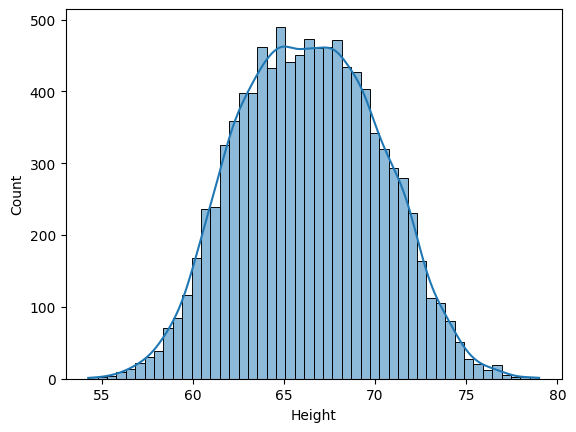

In [7]:
sns.histplot(df['Height'],kde=True)

<Axes: xlabel='Height'>

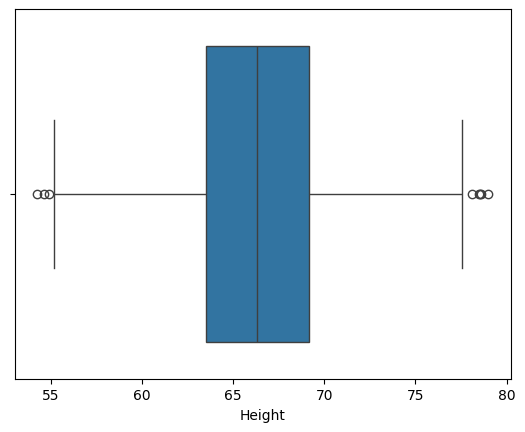

In [8]:
sns.boxplot(x=df['Height'])

In [9]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [10]:
upper_limit,lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

### Trimming

In [14]:
new_df = df[(df['Height'] >= lower_limit) & (df['Height'] <= upper_limit)]

In [15]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [16]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [17]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

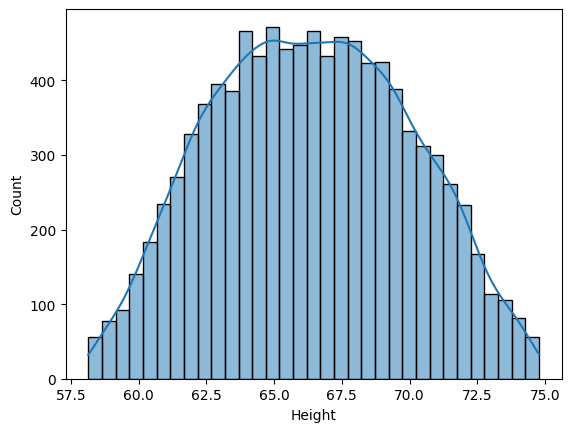

In [18]:
sns.histplot(new_df['Height'],kde=True)

<Axes: xlabel='Height'>

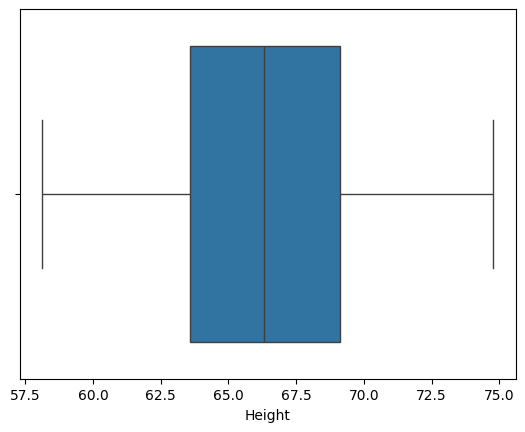

In [19]:
sns.boxplot(x=new_df['Height'])

### Capping (Winsorization)

In [23]:
df_cap = df.copy()

df_cap['Height'] = np.where(
    df_cap['Height'] >= upper_limit,
    upper_limit,
    np.where(
        df_cap['Height'] <=lower_limit,
        lower_limit,
        df_cap['Height']
    )
)

In [27]:
df_cap['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [28]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

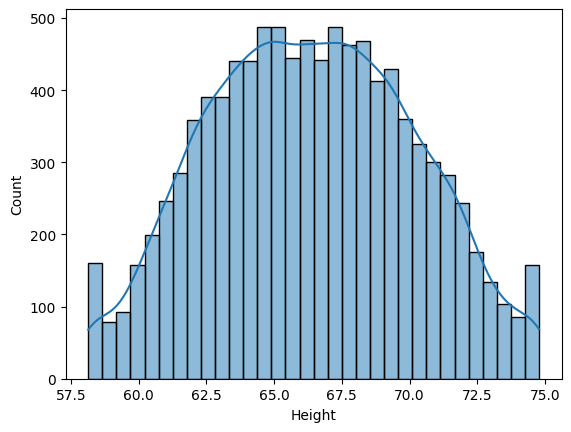

In [30]:
sns.histplot(df_cap['Height'],kde=True)

<Axes: xlabel='Height'>

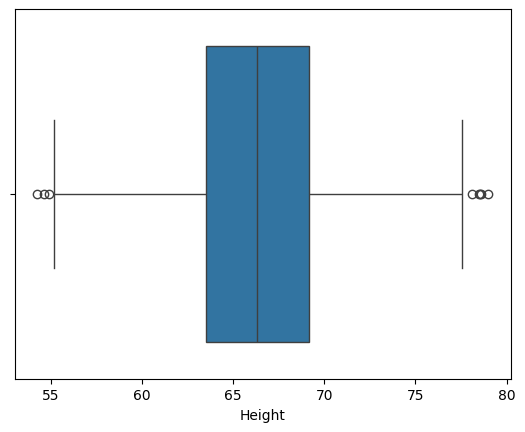

In [32]:
sns.boxplot(x=df['Height'])

<Axes: xlabel='Height'>

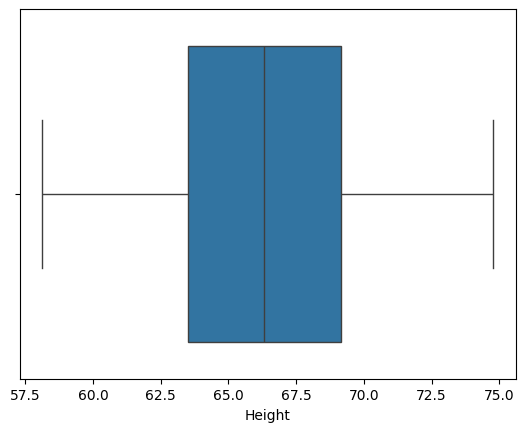

In [31]:
sns.boxplot(x=df_cap['Height'])